In [2]:
import nltk
from language_identifier import *
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
nltk.download('europarl_raw')
import nltk.corpus.europarl_raw as europarl

[nltk_data] Downloading package europarl_raw to
[nltk_data]     C:\Users\Jordi\AppData\Roaming\nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!


In [14]:
LangId = LanguageIdentifier()

In [13]:
portuguese = europarl.portuguese.raw('ep-00-01-17.pt')
greek = europarl.greek.raw('ep-00-01-17.el')
finnish = europarl.finnish.raw('ep-00-01-17.fi')
danish = europarl.danish.raw('ep-00-01-17.da')

In [15]:
portuguese_pred = LangId.identify_language(portuguese)
greek_pred = LangId.identify_language(greek)
finnish_pred = LangId.identify_language(finnish)
danish_pred = LangId.identify_language(danish)

c:\Users\Jordi\Desktop\Universitat\plhp1\Naive-Language-Classifier\language_identifier.py:105: UserWarning: Path not specified or incorrect, interpreting as string.
  warnings.warn("Path not specified or incorrect, interpreting as string.")


In [16]:
portuguese_true = np.full(portuguese_pred.shape[0],'por')
greek_true = np.full(greek_pred.shape[0],'ell')
finnish_true = np.full(finnish_pred.shape[0],'fin')
danish_true = np.full(danish_pred.shape[0],'dan')
    

In [17]:
y_pred = np.concatenate([portuguese_pred, greek_pred, finnish_pred, danish_pred])
y_true = np.concatenate([portuguese_true, greek_true, finnish_true, danish_true])

In [49]:
a,b = np.unique(y_pred, return_counts=True)

In [57]:
np.unique(y_true)

array(['dan', 'ell', 'fin', 'por'], dtype='<U3')

In [50]:
b

array([ 711,   31,   23,   40, 1889,  824], dtype=int64)

In [51]:
b = b/np.sum(b)

In [52]:
a

array(['deu', 'eng', 'fra', 'ita', 'nld', 'spa'], dtype='<U3')

In [53]:
b

array([0.20210347, 0.00881182, 0.00653781, 0.0113701 , 0.53695281,
       0.23422399])

In [54]:
cm = confusion_matrix(y_true, y_pred)

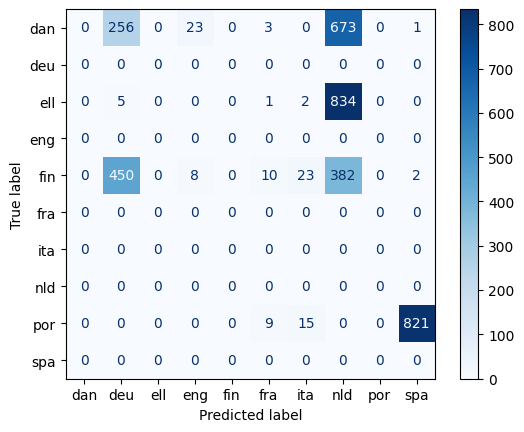

In [58]:
confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=['dan',"deu",'ell',"eng",'fin',"fra","ita","nld",'por',"spa"])
confusion_matrix_display.plot(cmap='Blues')